# Modelowanie - warsztaty

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Z tych importów będziemy często korzystać, i pewnie nie zawsze będzie nam się chciało je wszystkie wpisywać. Dlatego czeka Was na wstępie krótkie ćwiczenie:

### Ćwiczenie 01
* Utwórz w folderze z tym notebookiem plik `importy.py` (upewnij się że **nie jest** to plik `.txt`). Możesz skorzystać np. z edytora tekstowego [Atom](https://atom.io/).
* skopiuj do pliku `importy.py` importy pojawiające się w pierwszej komórce tego notebook'a i zapisz `importy.py`
* zamień zawartość komórki z importami na:
  ```python
  from importy import **
  ```
  znaczy to *z pliku/modułu importy zaimportuj wszystko*
* zrestartuj notebook (`kernel --> restart`) i sprawdź czy działają Ci następne trzy komórki:

In [3]:
# komórka do testu 1
losowe = np.random.random((3, 2))
print('\nmacierz losowych wartości:\n', losowe)
print('\nśrednia z losowych wartości:\n', losowe.mean())


macierz losowych wartości:
 [[0.64300881 0.72878126]
 [0.31818155 0.75237587]
 [0.20329988 0.80579484]]

średnia z losowych wartości:
 0.5752403665016032


(-0.5, 1.5, 2.5, -0.5)

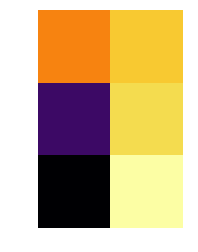

In [4]:
# komórka do testu 2
plt.imshow(losowe, cmap='inferno')
plt.axis('off')

In [5]:
# komórka do testu 3
df = pd.DataFrame(data=losowe, columns=['A', 'B'])
df.head()

,A,B
0,0.643009,0.728781
1,0.318182,0.752376
2,0.203300,0.805795


W ten sposób możecie mieć jeden plik, w którym grupujecie wszystkie często przez Was wykorzystywane importy. Zamiast wpisywania/wklejania tych wszystkich importów importujecie zawartość całego pliku.
W przypadku jupyter notebook'a można też zdefiniować aby zawsze na starcie importował pewne pakiety czy wykonywał pewne komendy:
https://stackoverflow.com/questions/32211109/automate-standard-jupyter-ipython-notebook-imports?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

## Titanic
Będziemy korzystać z dataset'u `titanic`, który widzieliście na poprzednich zajęciach. Dataset ten jest dostępny w wielu miejscach, ale my skorzystamy z kopii udostępnianej z pakietem `seaborn`:

In [6]:
import seaborn as sns
print("wersja seaborn'a:\n", sns.__version__)

wersja seaborn'a:
 0.8.1


In [7]:
# sprawdzamy nazwy datasetów dostępnych w ramach seaborn'a (nie przejmujcie się czerwonym warningiem)
nazwy_datasetów = sns.get_dataset_names()
print(nazwy_datasetów)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'planets', 'tips', 'titanic']


In [8]:
# widzimy, że datasetów jest trochę, my wczytujemy dataset titanic:
titanic = sns.load_dataset('titanic')

Dataset jest wczytany w formie DataFrame'u pakietu pandas. Jeżeli mieliście styczność z R'em - nazwa dataframe powinna być Wam znajoma. To format tabeli, w której najczęściej w kolumnach mamy oddzielne zmienne a w wierszach obserwacje. Nauczycie się dzisiaj podstawowych operacji na DataFrame'ach, tak abyście mogli przed dopasowaniem do danych modelu, lepiej je zrozumieć poprzez eksplorację. 
W zmiennej `titanic` macie teraz taki dataframe. Podstawowa operacja to wyświetlenie pierwszych kilku wierszy z użyciem metody `.head()`. W kolejnej komórce wykonajcie komendę `df.head()` gdzie `df` to nazwa zmiennej, w której znajduje się interesujący Was dataframe:

In [14]:
# tutaj skorzystaj z metody head


Metoda head umożliwia podanie jednego argumentu wejściowego - liczby wyświetlanych wierszy. W związku z tym:
```python
df.head(12)
```
umożliwia wyświetenie dwunastu pierwszych wierszy dataframe'u `df`.
W kolejnej komórce wyświetl 10 pierwszych wierszy naszego dataframe'u.

In [15]:
# tutaj wyświetl 10 pierwszych wierszy naszego dataset'u

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Dataframe ma też atrybut `.columns`, w którym są nazwy wszystkich kolumn:

In [9]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Podobnie do macierzy numpy, dataframe'y umożliwiają sprawdzenie rozmiaru za pomocą metody `.shape`:

In [19]:
titanic.shape

(891, 15)

Uzupełnij poniższe zdanie:
```
Dowiadujemy się że dataframe ma ........... kolumn oraz ................ wierszy.
```

Dataframe pozwala również rysować podstawowe informacje dotyczące danych, które zawiera. Narysujemy sobie na przykład boxplot przedstawiający wiek (`age`) w podziale na klasy (`class`):

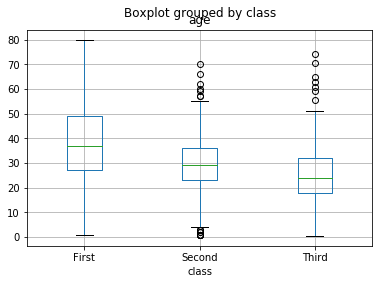

In [10]:
titanic.boxplot('age', by='class')

Podobne wykresy możemy robić z wykorzystaniem pakietu seaborn (zwróćcie uwagę na dosyć podobną składnię):

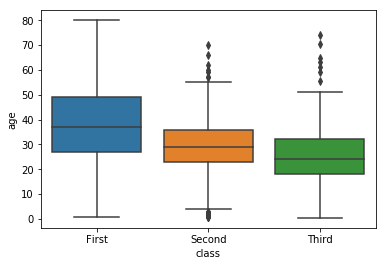

In [11]:
sns.boxplot('class', 'age', data=titanic)

Seaborn umożliwia też zmianę stylu wykresu (`set_style`) oraz używanej palety kolorystycznej (`set_palette`), zobaczcie poniżej:

In [12]:
sns.set_style('darkgrid')
sns.set_palette('deep')

Teraz przekopiujcie poniżej kod obu wykresów boxplotowych (pierwszy bezpośrednio z dataframe'u, drugi z użyciem seaborna). Zobaczycie, że styl wykresów będzie teraz inny:

In [ ]:
# tutaj pierwszy wykres

In [ ]:
# tutaj drugi wykres

Możemy też, korzystając z metody `.loc[]` wybierać interesujące nas kolumny i wiersze:

In [13]:
titanic.loc[:6, 'sex':'class']

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
5,male,NaN,0,0,8.4583,Q,Third
6,male,54.0,0,0,51.8625,S,First


Poniżej wybierz w podobny sposób z dataframe'u wiersze od 10 do 18 (zauważ że w trybie `loc` indeksowanie wierszy jest nie-pythonowe tzn. wlicza ostatni element zakresu) i kolumny od `'fare'` do `'deck'`:

In [ ]:
# tutaj wybierz odpowiednie wiersze i kolumny

Gdy chcesz wybrać wszystkie kolumny możesz jako drugi argument w `loc` podać dwukropek:

In [14]:
titanic.loc[111:113, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
112,0,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False


Możemy też w zakresie kolumn (drugi argument w `loc`) nie podawać ostatniej kolumny, wtedy zostaną wybrane kolumny od podanej przez nas do ostatniej:

In [15]:
titanic.loc[111:113, 'who':]

,who,adult_male,deck,embark_town,alive,alone
111,child,False,NaN,Cherbourg,no,False
112,man,True,NaN,Southampton,no,True
113,woman,False,NaN,Southampton,no,False


W przypadku tego datasetu interesować nas będzie czy pasażer przeżył niefortunny rejs statku.
Informację tę znajdziemy z kolumnie `survived`. Możemy dostać się do kolumny dataframe'u (oprócz metody `loc`) w ten prosty sposób:

In [16]:
# wyświetlamy infromację o przeżyciu pierwszych 5 osób
titanic.survived[:5]

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

Zauważcie, że dostajemy kolumnę **wraz z etykietami wierszy**. Dodatkowo korzystaliśmy z normalnego pythonowego indeksowania, więc dostaliśmy pierwszych 5 wierszy niezależnie od ich etykiet (swoją drogą - etykiety wierszy mogą w pandas nie być liczbami a np literami czy słowami, jest duża dowolność).
W sytuacji gdy chcemy dostać nie kolumne typu `pandas` z etykietami wierszy ale sam wektor numpy, możemy dostać się do atrybutu `.values`:

In [17]:
titanic.survived[:5].values

array([0, 1, 1, 1, 0], dtype=int64)

Kolumny (ale nawet całe dataframe'y) obsługują różne operacje matematyczne takie jak np. średnia. Gdy chcemy się dowiedzieć ile osób procentowo przeżyło rejs statkiem, możemy dostać się do kolumny `survived` a następnie zrobić z niej średnią (metoda `.mean()`):

In [18]:
titanic.survived.mean()

0.3838383838383838

Niestety mniej więcej tylko trzy ósme pasażerów przeżyło podróż.  
Co zdeterminowało o przeżyciu bądź śmierci poszczególnych pasażerów? Płeć, wiek, cena biletu, klasa, podróżowanie z innymi osobami? Na te pytania spróbujemy odpowiedzieć na dzisiejszych zajęciach korzystając z regresji logistycznej - modelu o którym mówiliśmy na ostatnich zajęciach.

## Ćwiczenia
Zanim jednak przejdziemy do eksploracji danych, kilka ćwiczeń dla Ciebie:
1. sprawdź średni wiek (`age`) pasażerów
2. sprawdź jaki procent pierwszych 100 pasażerów przeżył podróż
3. skorzystaj z metody `.unique()` na kolumnie `titanic.who` aby poznać unikatowe (niepowtarzające się) wartości tej kolumny
4. narysuj histogram cen biletów korzystąc z metody `.hist()` odpowiedniej kolumny
5. metoda `.hist()` przyjmuje wiele dodatkowych argumentów, skorzystaj z argumentu nazwowego `bins` aby narysować ten sam histogram co w punkcie 4, ale składający się z 35 binów.

Interesuje nas ile osób przeżyło w zależności od klasy, ale w pierwszej kolejności zobaczmy ilu pasażerów podróżowało w każdej z klas. Skorzystamy do tego z funkcji `countplot` pakietu `seaborn`:

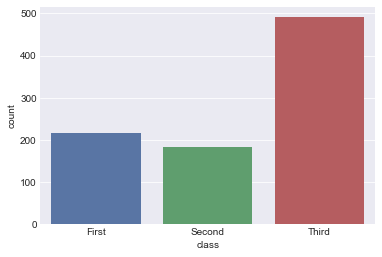

In [20]:
sns.countplot('class', data=titanic)

Widzimy, że najwięcej osób podróżowało w klasie trzeciej. Zobaczmy teraz ile osób przeżyło (kolumna `survived`) w podziale na klasy (kolumna `class`). Skorzystamy z tej samej funkcji, co powyżej, ale tym razem pierwszym argumentem będzie nazwa kolumny opisującej przeżycie. Dodatkowo skorzystamy z argumentu nazwowego `hue` i podamy w nim nazwę kolumny w podziale na którą chcemy zobaczyć wykres (chcemy zobaczyć przeżycie w podziale kolorami na klasy). W efekcie po jednej stronie wykresu będziemy mieli osoby, które przeżyły podróż, a po drugiej te, które zginęł, a każda z tych kategorii będzie podzielona na kolorowe słupki reprezentujące klasę.  
W razie problemów śmiało pytaj prowadzącego o popowiedź.

In [ ]:
# tutaj wykres

Teraz zamień miejscami nazwy kolumn (tę która jest pierwszym argumentem `sns.countplot` oraz tę którą podajesz w argumencie nazwowym `hue`) tzn. stwórz wykres ilości osób w różnych klasach w podziale kolorystycznym na przeżycie. Zwróć uwagę na różnice względem poprzedniego wykresu. Który Twoim zdaniem jest czytelniejszy i dlaczego?

In [ ]:
# tutaj wykres

Chcemy jednak zobaczyć przeżycie w ujęciu procentowym dla każdej z klas. Najpierw spróbujemy wyselekcjonować oddzielnie
pasażerów pierwszej i trzeciej klasy i zobaczyć ile % z nich przeżyło. Do selekcji danych bardzo przydaje się metoda
`.query()` - pozwala ona podać warunek selekcji jako napis i zwraca dane spełniające ten warunek. Przykładowo, jeżeli chcemy stworzyć
oddzielny dataframe zawierający informację tylko na temat pasażerów, którzy skończyli 60 i więcej lat, zrobilibyśmy to tak:
```python
older_titanic = titanic.query('age > 60')
```
W podobny sposób wybierzemy pasażerów należących do danej klasy. Skorzystamy do tego z kolumny `pclass` opisującej numer klasy
(tzn. zawierający wartość liczbową odpowiadającą tekstowemu opisowi w kolumnie `class`):

In [28]:
df_first = titanic.query('pclass == 1')
df_third = titanic.query('pclass == 3')

In [29]:
df_first.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


Aby teraz dowiedzieć się jaka część pasażerów pierwszej klasy przeżyła podróż, wystarczy że wykonamy operację średniej na kolumnie `survived` dataframe'u `df_first`. Analogicznie dla pasażerów trzeciej klasy.
Wykonaj te operację dla jednego i drugiego dataframe'u (zawierającego jedną wybraną klasę) i porównaj jaki procent pasażerów przeżył w zależności od klasy.

Pandas umożliwia też wykonanie tego porównania prościej korzystając z metody `groupby`, która pozwala podzielenie dataframe'u z uwzględnieniem danej kategorii. Gdy chcemy podzielić dataframe pod względem klasy napiszemy `titanic.groupby('class')`. Następnie gdy dostaniemy się do kolumny `survived` i wykonamy na niej średnią zobaczymy średnią przeżywalność (procent pasażerów, którzy przeżyli podróż) w podziale na klasę:

In [25]:
titanic.groupby('class').survived.mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Widzimy teraz wyraźnie, że największą szansę na przeżycie mieli pasażerowie pierwszej klasy, najniższą zaś - pasażerowie klasy trzeciej. Chcielibyśmy uchwycić teraz tę zależność w modelu statystycznym korzystając z regresji.  
W pierwszej kolejności sprawdzimy zależność między zmienną `survived` a `pclass` tzn numeryczną reprezentacją klasy.
Nasza hipoteza jest w związku z tym taka, że przeżywalność zależy liniowo od klasy - im niższa klasa, tym wyższa przeżywalność.  
W pierwszej kolejności wyprodukujemy sobie wykres tej zależności korzystając z funkcji `sns.regplot` - funkcja ta pozwala na wyświetlanie zależności na podstawie modelu regresji. Uzupełnij kod poniżej wpisując poprawne nazwy kolumn zamiast tekstu `'nazwa kolumny dla ...'`. Pamiętaj że nazwy kolumn podajemy jako napisy (np. `'age'` dla kolumny określającej wiek).

In [ ]:
sns.regplot('nazwa kolumny dla osi x', 'nazwa kolumny dla osi y', data=titanic)

Wykres powinien wyglądać tak:

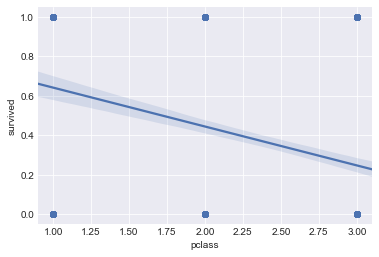

Widzimy że linia regresji wskazuje na spadek przeżywalności dla rosnących klas. Jednak punkty prezentujące poszególnych pasażerów nakładają się na siebie. Rozproszymy je trochę w osi x oraz w osi y aby wykres był bardziej czytelny. Dodaj do argumentów funkcji `sns.regplot`: `x_jitter=0.2, y_jitter=0.15` aby otrzymać wykres jak poniżej:

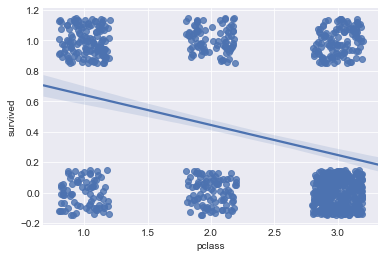

In [36]:
sns.regplot(______, _______, data=_______, x_jitter=____, y_jitter=_____)

Chcielibyśmy teraz nie tylko zwizualizować tę zależność, ale faktycznie dopasować model liniowy. Skorzystamy do tego z biblioteki `statsmodels`, której specjalność to właśnie modele statystyczne. Najpierw wczytamy bibliotekę (a konkretnie jej moduł pozwalający na wygodne dopasowywanie modeli z użyciem formuł tekstowych):

In [37]:
import statsmodels.formula.api as smf

Teraz możemy skorzystać z funkcji `ols` aby dopasować model liniowy (`ols` bierze się od *ordinary least squares* - z ostatnich zajęć powinniście pamiętać mniej więcej dlaczego *squares* i dlaczego *least*). Chcemy korzystając z tego modelu przewidywać przeżywalność (`survived`) za pomocą klasy (`pclass`). W R'rze oraz w pythonie opisujemy tego typu zależności za pomocą tzw. formuł, o ogólnym kształcie: `'przewidywana _zmienna ~ zmienna_przewidująca'`. W naszym wypadku napiszemy w związku z tym formułę jako `'survived ~ pclass'`.

In [39]:
model = smf.ols(formula='survived ~ pclass', data=titanic)

Model musimy następnie dopasować do danych korzystając z metody `.fit()`:

In [40]:
results = model.fit()

Wyniki modelu możemy wyświetlić z użyciem metody `.summary()`:

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.54e-25
Time:                        19:07:52   Log-Likelihood:                -567.75
No. Observations:                 891   AIC:                             1140.
Df Residuals:                     889   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8386      0.045     18.597      0.000       0.750       0.927
pclass        -0.1970      0.018    -10.725      0.000      -0.233      -0.161
==============================================================================
Omnibus:                     1338.045   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.541
Skew:                           0.428   Prob(JB):                     9.79e-20
Kurtosis:                       1.725   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pojawia się tutaj mnóstwo informacji, które nas nie będą interesować, także nie przejmujcie się tym natłokiem złożonej terminologii. Interesuje nas teraz tylko tabelka z kolumnami: *coef*, *std err*, *t* oraz *P>|t|*.
W tej tabeli w wierszach zobaczymy: *Intercept* oraz *pclass*. To pierwsze to ogólna średnia dla wszystkich grup, natomiast drugie to stromość linii uwzględniającej wpływ klasy (`pclass`). Zauważcie że *coef* dla *pclass* wynosi `-0.197`, w zaokrągleniu `-0.2`, a więc z każdą kolejną klasą prawdopodobieństwo przeżycia spada o 20% (`-0.2`). Wartość w kolumnie t mówi o sile tego efektu (statystykę t możecie traktować jako stosunek sygnału czy efektu do szumu), a *P>|t|* o istotności. Efekty poniżej t -2 oraz powyżej t 2 są zwykle istotne. t poniżej -10 (jak w tym wypadku) to bardzo silny efekt, możecie zresztą zobaczyć, że p (istotność) jest bardzo niska. Efekt klasy jest bez wątpienia istotny pod kątem przeżywalności pasażerów statku Titanic.

Możemy sobie zadać pytanie czy dodatkowo płeć przewiduje przeżywalność, ale wiemy, że w pierwszej kolejności ratowane są zazwyczaj kobiety i dzieci, więc płeć będzie mieć znaczenie w zależności od wieku. Zamiast robić złożone analizy interakcji płci oraz wieku zrobimy coś znaczeni prostszego, skożystamy z kolumny `who`, która opisuje każdego pasażera jako mężczyznę, kobietę lubi dziecko. Poniżej wyświetlamy wszystkie unikatowe wartości kolumny `who`:

In [43]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

Aby dodać tę zmienną do modelu dodajemy ją w formule z użyciem znaku `+` tzn.:
`'survived ~ pclass + who'`.  
Stwórz i dopasuje model z taką formułą podobnie jak robiliśmy to wyżej, a następnie wyświetl wyniki.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     192.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           3.07e-96
Time:                        19:29:08   Log-Likelihood:                -398.33
No. Observations:                 891   AIC:                             804.7
Df Residuals:                     887   BIC:                             823.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0202      0.058     17.518      0.000       0.906       1.135
who[T.man]      -0.4681      0.045    -10.425      0.000      -0.556      -0.380
who[T.woman]     0.0774      0.048      1.603      0.109      -0.017       0.172
pclass          -0.1637      0.016    -10.554      0.000      -0.194      -0.133
==============================================================================
Omnibus:                       33.788   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.673
Skew:                           0.490   Prob(JB):                     1.09e-08
Kurtosis:                       3.165   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

W wynikach zobaczysz dodatkowo wiersze dla `'who[T.man]'` oraz `'who[T.woman]'`. Zmienna `who` jest zmienną kategorialną a nie ilościową więc model został skonstruowany opisując efekt dwóch z trzech kategorii względem kategorii bazowej. Tzn. efekt `'who[T.man]` opisuje jak na przeżywalność wpływa bycie mężczyzną w porównaniu do bycia dzieckiem (kategoria bazowa). Wybór kategorii bazowej to nasza indywidualna decyzjna - wpływa na interpretację modelu.  
Widzimy w każdym razie że mężczyzna ma średnio o 47% niższe szanse przeżycia w porównaniu do dziecka (*coef* dla `'who[T.man]'` to `-0.4681`, efekt ten jest bardzo silny: `t = -10.425` i istotny `p < 0.001`) natomiast szanse przeżycia kobiety są porównywalne.

Podsumujmy sobie zbadane zależności na jednym wykresie:  
Skożystamy z funkcji `sns.factorplot` aby, tak jak wcześniej w wykresach dla regresji, na osi x prezentować klasę biletu, na osi y natomiast przeżycie. Kolorem (`hue=`) chcemy mieć oznaczone oddzielne linie dla roli pasażera (`who`), dane to oczywiście nasz dataframe `titanic`:

In [ ]:
sns.factorplot(_______, ________, hue=_____, data=titanic)

### Ćwiczenie
Spróbuj dodać do modelu jeszcze jedną, albo dwie zmienne, co do których wydaje Ci się, że miałyby sens.

In [ ]:
# tutaj ćwiczenie

<div class="alert alert-warning">
Uwaga! Bardziej poprawne w wypadku powyżej byłoby korzystanie z regresji logistycznej, nie liniowej,  
ponieważ przeżycie pojedynczej osoby to `tak` albo `nie`.  
Model liniowy zakłada natomiast, że zmienna zależna jest ilościowa, a nie dychotomiczna.  
W przykładzie poniżej, gdy przejdziemy do uczenia maszynowego, skorzystamy już z regresji  
logistycznej.  
Jeżeli chcesz dopasować model logistyczny do danych z użyciem `statsmodels` skorzystaj z  
`smf.Logit` - reszta jest taka sama jak dla regresji liniowej. W internecie jest wiele
pomocnych  
materiałów np.: [ten tutorial](http://blog.yhat.com/posts/logistic-regression-and-python.html)
</div>

## Uczenie maszynowe
W uczeniu maszynowym interesuje nas bardziej przewidywanie niż zrozumienie zależności w danych.
Wyobraźmy sobie że zastanawiamy się nad podróżą Tytanikiem II - zanim zdecydujemy się na podróż chcielibyśmy wiedzieć, czy mamy szanse ją przeżyć. Ważniejsze jest dla nas aby trafnie przewidzieć nasze szanse przeżycia, nawet kosztem zrozumienia dlaczego model, z którego korzystamy zwraca określone przewidywanie. Dlatego w uczeniu maszynowym często korzysta się z dużo bardziej złożonych modeli niż w klasycznej statystyce i nie opisuje efektów pod kątem istotności efektów, ale poprawności naszych predykcji.  
Najczęściej w uczeniu maszynowym symulujemy predykcję poprzez podzielenie danych na dwa zbiory - treningowy oraz testowy.
**Zbiór treningowy** to dane, z których korzystamy aby dopasować nasz model. **Ziór testowy** to dane, dla których sprawdzamy jak trafne są nasze predykcje.  
Najpopularniejszym pakietem do uczenia maszynowego (z pominięciem złożonych sieci neuronowych) jest `scikit-learn`, w skrócie `sklearn`. Pakiet ten ma bardzo bogatą [dokumnetację](http://scikit-learn.org/stable/index.html).
Najpierw wczytamy tylko funkcję do dzielenia danych na dane testowe i treningowe oraz model z którego będziemy korzystać - regresję logistyczną:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Przekształcanie danych
Podstawowa różnica między `statsmodels` a `sklearn` jest taka, że `sklearn` korzysta z macierzy, a nie dataframe'ów, dlatego w pierwszym kroku zamienimy nasz dataframe na macierz. Będziemy musieli w tym celu zamienić kolumny zawierające dane kategorialne (takie jak np. `who`) na zmienne dychotomiczne. Kolumna `who` ma np. trzy kategorie - zamienimy ją w związku z tym w dwie kolumny zero-jedynkowe (dychotomiczne) w naszej macierzy (nie potrzebujemy aż trzech kolumn w tym wypadku - trzecia niosła by redundantne informacje względem dwóch poprzednich). Do zamiany kolumn kategorialnych na dychotomiczne użyjemy funkcji `pd.get_dummies`.  
<div class="alert alert-warning">
Nie musicie dokładnie rozumieć poszczególnych kroków przekształcania dataframe'u na macierz. Ważne tylko abyście przeczytali sekcję poniżej aby mieć ogólne zrozumienie jak tego rodzaju kroki są wykonywane.
</div>
  
Przypomnijmy sobie najpierw jak wyglądają nasze dane:

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Najpierw weźmy kolumny ilościowe: pclass (klasa biletu), age (wiek), sibsp (liczba rodzeństwa bądź małżonków na pokładzie) parch (liczba rodziców / dzieci na pokładzie), fare (opłata):

In [76]:
columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']
titanic_selected = titanic.loc[:, columns]
data_matrix = titanic_selected.values
print(data_matrix[:6, :])

[[ 3.     22.      1.      0.      7.25  ]
 [ 1.     38.      1.      0.     71.2833]
 [ 3.     26.      0.      0.      7.925 ]
 [ 1.     35.      1.      0.     53.1   ]
 [ 3.     35.      0.      0.      8.05  ]
 [ 3.         nan  0.      0.      8.4583]]


możecie przy okazji zwrócić uwagę powyżej na wartość w drugiej kolumnie, ostatnim wierszu: `nan` - to brak danych. Z brakami poradzimy sobie później.  
W następnej kolejności zajmijmy się płcią: kolumna `sex`. Korzystamy z `pd.get_dummies` podając kolumnę sex oraz używamy `drop_first=True` aby dostać o jedną kolumnę mniej niż liczba kategorii (aby uniknąć nadmiarowych informacjii):

In [77]:
sx = pd.get_dummies(titanic.sex, drop_first=True)
sx[:6]

,male
0,1
1,0
2,0
3,0
4,1
5,1


Możemy dokleić tę kolumnę do naszej macierzy `data_matrix` za pomocą `np.concatenate`, łącząc po drugim wymiarze (pierwszy - wiersze, drugi - kolumny):

In [78]:
data_matrix = np.concatenate([data_matrix, sx.values], axis=1)
columns.append('sex')
print(data_matrix[:6])

[[ 3.     22.      1.      0.      7.25    1.    ]
 [ 1.     38.      1.      0.     71.2833  0.    ]
 [ 3.     26.      0.      0.      7.925   0.    ]
 [ 1.     35.      1.      0.     53.1     0.    ]
 [ 3.     35.      0.      0.      8.05    1.    ]
 [ 3.         nan  0.      0.      8.4583  1.    ]]


Tak samo postąpimy z kolumną `alone`:

In [79]:
aln = pd.get_dummies(titanic.alone, drop_first=True)
data_matrix = np.concatenate([data_matrix, aln.values], axis=1)
columns.append('alone')

print(data_matrix[:6])

[[ 3.     22.      1.      0.      7.25    1.      0.    ]
 [ 1.     38.      1.      0.     71.2833  0.      0.    ]
 [ 3.     26.      0.      0.      7.925   0.      1.    ]
 [ 1.     35.      1.      0.     53.1     0.      0.    ]
 [ 3.     35.      0.      0.      8.05    1.      1.    ]
 [ 3.         nan  0.      0.      8.4583  1.      1.    ]]


Zostaje nam już tylko `who`:

In [80]:
who = pd.get_dummies(titanic.who, drop_first=True)
who[:3]

,man,woman
0,1,0
1,0,1
2,0,1


In [81]:
data_matrix = np.concatenate([data_matrix, who.values], axis=1)
columns.extend(['who_man', 'who_woman'])

print(data_matrix[:6])

[[ 3.     22.      1.      0.      7.25    1.      0.      1.      0.    ]
 [ 1.     38.      1.      0.     71.2833  0.      0.      0.      1.    ]
 [ 3.     26.      0.      0.      7.925   0.      1.      0.      1.    ]
 [ 1.     35.      1.      0.     53.1     0.      0.      0.      1.    ]
 [ 3.     35.      0.      0.      8.05    1.      1.      1.      0.    ]
 [ 3.         nan  0.      0.      8.4583  1.      1.      1.      0.    ]]


Reszta kolumn nie będzie nas interesować. To już koniec przekształceń!  
Nagródźmy się kolorową reprezentacją części naszych danych:

(-0.5, 5.5, 9.5, -0.5)

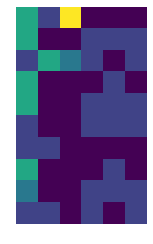

In [82]:
plt.imshow(data_matrix[25:35, [0, 2, 3, 5, 6, 7]], cmap='viridis')
plt.axis('off')

### Dzielenie na dane treningowe i testowe

Interesuje nas przewidywanie przeżycia tzn. kolumny `survived`, zapiszemy ją sobie w formacie numpy w zmiennej `y`:

In [74]:
y = titanic.survived.values

Dzielimy nasze dane (`data_matrix`) i zmienną zależną (`y`) na zbiór testowy i treningowy. Chcemy aby zbiór testowy wynosił 30% treningowego, dodatkowo podajemy `random_state` aby losowanie było takie same nawet jak uruchomimy ten notebook ponownie (a także między różnymi komputerami).

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_matrix, y, test_size=0.3, random_state=42)

Najpierw zobaczmy jak nam idzie przewidywanie dla dwóch zmiennych, z których korzystaliśmy wcześniej budując model statystyczny: `pclass` oraz `who_man`. Przypomnijmy sobie, które są to kolumny w naszej macierzy (wiemy o tym ponieważ tworzyliśmy na bieżąco listę nazw kolumn `columns`):

In [85]:
print(columns)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'alone', 'who_man', 'who_woman']


Pierwsza oraz przedostatnia kolumna - wybierzemy je teraz zarówno dla danych treningowych jak i testowych:

In [86]:
xtr = X_train[:, [0, -2]]
xts = X_test[:, [0, -2]]

### Przewidujemy (na razie z użyciem dwóch zmiennych)

Korztystamy z regresji logistycznej (wcześniej wczytanej funkcji `LogisticRegression`) - najpierw tworzymy klasyfikator (regresję logistyczną):

In [125]:
logistic_model = LogisticRegression()

Teraz korzystamy z metody `.fit()` klasyfikatora aby dopasować go do danych treningowych:
* `xtr`, macierzy zawierającej dwie kolumny z `data_matrix`
* `y_train` informacji o przeżyciu pasażera (odpowiadających kolejnym wierszom z `data_matrix`)

In [126]:
logistic_model.fit(xtr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Możemy następnie wygenerować przewidywania dla danych testowych (`xts`):

In [127]:
predictions = logistic_model.predict(xts)

In [128]:
predictions[:8]

array([0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

Przewidywania to po prostu zera i jedynki odpowiadające ocenie nie przeżyje (0) oraz przeżyje (1). Możemy je teraz porównać z faktycznym losem pasażerów znajdujących się w zbiorze testowym (`y_test`). Porównujemy `predictions` z `y_test` z użyciem identyczności (`==`), co daje nam listę (a konkretnie wektor) zer i jedynek - zera gdzie predykcja nie zgadza się z faktycznym losem, jeden gdzie predykcja jest trafna. Uśrednienie tej listy daje nam średnią poprawność predykcji naszego modelu:

In [90]:
poprawność = (predictions == y_test).mean()
print('Poprawność przewidywania naszego modelu to:', poprawność)

Poprawność przewidywania naszego modelu to: 0.7947761194029851


79% to całkiem nieźle, to prawie 80% poprawności przewidywań w oparciu tylko o dwie zmienne. Zanim przejdziemy dalej, spróbujemy zrozumieć lepiej co robi regresja logistyczne w oparciu o te dwie zmienne. W tym celu narysujemy sobie na jednym wykresie punkty odpowiadające pasażerom (kolorami oznaczając czy przeżyli). Oś x tego wykresu to będzie klasa biletu, natomiast oś y reprezentować będzie czy pasażer jest mężczyzną (nie-dzieckiem, przy czym nie mówimy tu o stanie umysłu):
<div class="alert alert-danger">
Uwaga!  
Kod przygotowujący wykresy może być dla Was czarną magią, nie musicie go zupełnie rozumieć. Ważne jest tylko zrozumienie _wykresu_.
</div>

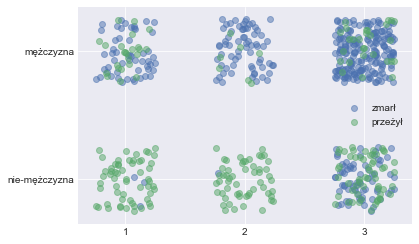

In [98]:
alive = y_train == 1
x = xtr + np.random.rand(*xtr.shape) * 0.5 - 0.25

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='zmarł')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='przeżył')

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['nie-mężczyzna', 'mężczyzna'])
plt.legend(loc='best')

Zwróćcie uwagę, że punkty są rozproszone dla czytelności, faktycznie każdy punkt zajmuje tylko jedną z sześciu pozycji (3 na osi x * 2 na osi y).  
Regresja logistyczna dzieli nam tę dwu-wymiarową przestrzeń prostą linią tak aby jak najlepiej rozseparować żywych od matrwych.

In [107]:
xx = np.linspace(0.5, 3.5, 100)
yy = np.linspace(-0.5, 1.5, 100).T
xx, yy = np.meshgrid(xx, yy)
full_grid = np.c_[xx.ravel(), yy.ravel()]

prob = logistic_model.predict_proba(full_grid)[:, 1].reshape((100, 100))

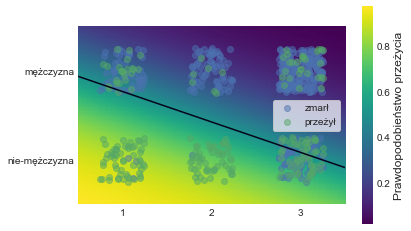

In [118]:
img = plt.imshow(prob, extent=[0.5, 3.5, -0.5, 1.5], origin='lower', cmap='viridis')

plt.scatter(x[~alive, 0], x[~alive, 1], alpha=0.5, label='zmarł')
plt.scatter(x[alive, 0], x[alive, 1], alpha=0.5, label='przeżył')

plt.contour(xx, yy, prob, levels=[0.5])

plt.xticks([1, 2, 3])
plt.yticks([0, 1], ['nie-mężczyzna', 'mężczyzna'])
plt.legend(loc='best', frameon=True, fancybox=True)
plt.grid('off')
cbar = plt.colorbar(img)
cbar.ax.set_ylabel('Prawdopodobieństwo przeżycia', fontsize=12)

Widzimy, że regresja logistyczna przyporządkowuje punktom w powyższej, dwuwymiarowej przestrzeni, prawdopodobieństwo należenia do klasy "przeżył" - zaznaczone kolorem. Czarna linia to linia decyzyjna regresji logistycznej - powyżej tej linii prawdopodobieństwo przeżycia wynosi mniej niż 50%, poniżej - więcej niż 50%. Linia ta układa się w taki sposób, że sugeruje, że nasz sukces w przewidywaniu (poprawność 79%) wynika tylko z wykorzystania zmiennej `who_man`. Możesz to sprawdzić dopasowując model korzystający tylko z jednej zmiennej:

In [129]:
xtrain = X_train[:, [-2]]
xtest = X_test[:, [-2]]

logistic_model.___(xtrain, y_train)
predictions = logistic_model.______(xtest)

poprawność = (__________ == y_test).____()
print('Poprawność przewidywania naszego modelu to:', _________)

Poprawność przewidywania naszego modelu to: 0.7947761194029851


### Korzystamy ze wszystkich zmiennych:

Gdy chcemy skorzystać ze wszystkich zmiennych dobrze jest:
* poradzić sobie z brakami danych
* wystandaryzować zmienne

#### Braki danych
Funkcja `np.isnan` pozwala nam sprawdzić które obserwacje dla których zmiennych mają braki danych. Chcemy jednak usunąć wiersze (obserwacje) dla których pojawia się chociaż jeden brak. W związku z tym wykorzystujemy `any(axis=1)` - dla każdego wiersza dostajemy wtedy prawdę gdy w chociaż jednej jego kolumnie (`axis=1`) pojawia się prawda (a prawda w `np.isnan` to obecność braku danych). W ten sposób mamy `missing_train` mówiący nam o obserwacjach mających braki danych dla danych treningowych (i odpowiednio `missing_test` dla danych testowych). Możemy skorzystać z tego wektora aby wybrać tylko obserwacje, które nie mają braków danych np.: `X_train[~missing_train, :]` (wiersze które nie mają braków, wszystkie kolumny)

#### Standaryzacja
Korzystamy ze `StandardScaler` i jego metody `.fit_transform()` za pomocą której szybko dokonujemy standaryzacji każdej zmiennej (kolumny) w macierzy treningowej i testowej.

In [122]:
from sklearn.preprocessing import StandardScaler

# usuwamy wiersze z brakami danych
missing_train = np.isnan(X_train).any(axis=1)
missing_test = np.isnan(X_test).any(axis=1)

std = StandardScaler()
X_train_std = std.fit_transform(X_train[~missing_train, :])
X_test_std = std.fit_transform(X_test[~missing_test, :])

logistic_model.fit(X_train_std, y_train[~missing_train])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
predictions = logistic_model.predict(X_test_std)
poprawność = (predictions == y_test[~missing_test]).mean()
print('Poprawność przewidywania naszego modelu to:', poprawność)

Poprawność przewidywania naszego modelu to: 0.8186046511627907


Tylko nieco lepiej niż w sytuacji naszej jednej zmiennej - 82%.
Poprawić ten wynik moglibyśmy:
* dostosowując hiperparametry naszego klasyfikatora (regresji logistycznej)
* tworząc nowe zmienne (predyktory) np. obrazujące interakcję między niektórymi zmiennymi
* albo używając innego klasyfikatora (np. sieci neuronowej, która potrafi sama utworzyć sobie nowe predyktory np. interakcje z danych)  

Ale, zważywszy na to, że pewnie niewiele osób dojdzie do tego miejsca - o tym będziemy się uczyć następnym razem!